In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data1 = "/Users/maurits/Documents/Ironhack/week_04/gpw4/ironhack_gpw4/data/raw/T_ONTIME_MARKETING.csv"
data2 = "../data/raw/Consumer_Airfare_Report__Table_2_-_Top_1_000_City-Pair_Markets_20240710.csv"
data3 = "../data/raw/Bansard-airlines-codes-IATA-ICAO.xlsx"

df1 = pd.read_csv(data1)
# df2 = pd.read_csv(data2)
# iata = pd.read_excel(data3, sheet_name="IATA Airlines")
# all_airlines = pd.read_excel(data3, sheet_name="All Airlines")


/var/folders/3v/mdv6bm7j6n99zg9hqgt9n70r0000gn/T/ipykernel_84684/3695448295.py:9: DtypeWarning: Columns (40,44,45,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(data1)


In [50]:
flight = df1[['FL_DATE','MKT_UNIQUE_CARRIER','OP_UNIQUE_CARRIER','OP_CARRIER_FL_NUM','ORIGIN_CITY_NAME',
            'DEST_CITY_NAME','CRS_DEP_TIME','DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY','ARR_DELAY_NEW',
           'CANCELLED','DISTANCE']]

In [53]:
flight.head(10)

,FL_DATE,MKT_UNIQUE_CARRIER,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,DISTANCE
0,1/1/2024 12:00:00 AM,AA,AA,255,"New York, NY","Los Angeles, CA",900,852.0,-8.0,1124.0,-63.0,0.0,0.0,2475.0
1,1/1/2024 12:00:00 AM,AA,AA,32,"Los Angeles, CA","New York, NY",1235,1232.0,-3.0,2107.0,8.0,8.0,0.0,2475.0
2,1/1/2024 12:00:00 AM,AA,AA,1578,"Boston, MA","Los Angeles, CA",1800,1754.0,-6.0,2041.0,-59.0,0.0,0.0,2611.0
3,1/1/2024 12:00:00 AM,AA,AA,1578,"Los Angeles, CA","Boston, MA",750,742.0,-8.0,1638.0,19.0,19.0,0.0,2611.0
4,1/1/2024 12:00:00 AM,AA,AA,1225,"Phoenix, AZ","Portland, OR",1502,1458.0,-4.0,1654.0,0.0,0.0,0.0,1009.0
5,1/1/2024 12:00:00 AM,AA,AA,1225,"Portland, OR","Phoenix, AZ",1815,1815.0,0.0,2139.0,-8.0,0.0,0.0,1009.0
6,1/1/2024 12:00:00 AM,AA,AA,1332,"Denver, CO","Phoenix, AZ",1206,1204.0,-2.0,1355.0,-16.0,0.0,0.0,602.0
7,1/1/2024 12:00:00 AM,AA,AA,1332,"Phoenix, AZ","Denver, CO",930,926.0,-4.0,1110.0,-11.0,0.0,0.0,602.0
8,1/1/2024 12:00:00 AM,AA,AA,2658,"Portland, OR","Phoenix, AZ",508,503.0,-5.0,838.0,-2.0,0.0,0.0,1009.0
9,1/1/2024 12:00:00 AM,AA,AA,2459,"New York, NY","Santa Ana, CA",830,825.0,-5.0,1118.0,-53.0,0.0,0.0,2454.0


In [55]:
set = set(df1['MKT_UNIQUE_CARRIER'])
set

TypeError: 'set' object is not callable

In [57]:
df1.columns

Index(['FL_DATE', 'MKT_UNIQUE_CARRIER', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'DEST_CITY_MARKET_ID', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'DUP',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME',
       'TOTAL_ADD_GTIME', 'DIV_AIRPORT_LANDINGS', 'DIV_ACTUAL_ELAPSED_TIME',
       'DIV1_AIRPORT', 'DIV1_WHEELS_ON', 'DIV1_TOTAL_GTIME', 'DIV1_WHEELS_OFF',
       'DIV1_TAIL_NUM', 'DIV2_AIRPORT', 'DIV2_WHEELS_ON', 'DIV2_TOTAL_GTIME',
       'DIV2_WHEELS_OFF', 'DIV2_TAIL_NUM', 'DIV3_AIRPORT', 'DIV3_WHEELS_ON',
       'DIV3_TOTAL_GTIME', 'DIV3_WHEELS_OFF', 'DIV3_TAIL_NUM', 'DIV4_AIRPORT',
       'DIV4_WHEELS_ON', 'DIV4_TOTAL_G

In [59]:
# By OP UNIQUE CARRIER
flight['TOTAL_DELAY'] = flight['ARR_DELAY'] + flight['DEP_DELAY']
grouped_mean = flight.groupby('OP_UNIQUE_CARRIER')[['TOTAL_DELAY']].mean()

/var/folders/3v/mdv6bm7j6n99zg9hqgt9n70r0000gn/T/ipykernel_84684/1317069687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight['TOTAL_DELAY'] = flight['ARR_DELAY'] + flight['DEP_DELAY']


In [61]:
# flight['TOTAL_DELAY'] = flight['ARR_DELAY'] + flight['DEP_DELAY']
# grouped_sum = flight.groupby('OP_UNIQUE_CARRIER')[['TOTAL_DELAY']].sum()

In [161]:
df_sorted_mean = grouped_mean.sort_values(by='TOTAL_DELAY', ascending=True).round(2)
df_sorted_mean.describe().round(2)

# We should divide the total delays by the number of flights in order to arrive at a reliable number since the sum doesn't tell us the whole story. Alternatively we can use the mean to get this number. We can see that YX has a delay of 7.42 minutes per flight on average, while ZW has 108.45 minutes, almost 2 hours per flight.


,TOTAL_DELAY
count,21.00
mean,29.94
std,20.43
min,7.42
25%,20.54
50%,25.87
75%,33.29
max,108.45


In [65]:
top_5_total = df_sorted_mean.iloc[:5]
worst_5_total = df_sorted_mean.iloc[-5:].sort_values(by='TOTAL_DELAY', ascending=False)
worst_5_total

,TOTAL_DELAY
OP_UNIQUE_CARRIER,
ZW,108.45
YV,48.75
AA,41.70
OO,34.78
OH,33.49


In [68]:
# flight['TOTAL_DELAY'] = flight['ARR_DELAY'] + flight['DEP_DELAY']
grouped_arr_mean = flight.groupby('OP_UNIQUE_CARRIER')[['ARR_DELAY']].mean()
grouped_dep_mean = flight.groupby('OP_UNIQUE_CARRIER')[['DEP_DELAY']].mean()

In [70]:
df_sorted_mean_arr = grouped_arr_mean.sort_values(by='ARR_DELAY', ascending=True).round(2)
df_sorted_mean_dep = grouped_dep_mean.sort_values(by='DEP_DELAY', ascending=True).round(2)

In [72]:
top_5_arr = df_sorted_mean_arr.iloc[:5]
worst_5_arr = df_sorted_mean_arr.iloc[-5:].sort_values(by='ARR_DELAY', ascending=False)

In [74]:
top_5_dep = df_sorted_mean_dep.iloc[:5]
worst_5_dep = df_sorted_mean_dep.iloc[-5:].sort_values(by='DEP_DELAY', ascending=False)

In [94]:
top_5_overall = df_sorted_mean.iloc[:5]
worst_5_overall = df_sorted_mean.iloc[-5:].sort_values(by='TOTAL_DELAY', ascending=False)

In [76]:
top_5_dep

,DEP_DELAY
OP_UNIQUE_CARRIER,
YX,6.84
PT,8.91
HA,9.96
G7,10.37
QX,11.79


In [78]:
top_5_arr

,ARR_DELAY
OP_UNIQUE_CARRIER,
YX,0.77
G7,2.68
DL,4.36
PT,5.83
WN,6.42


/var/folders/3v/mdv6bm7j6n99zg9hqgt9n70r0000gn/T/ipykernel_84684/1854606500.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=top_5_dep, palette='viridis')


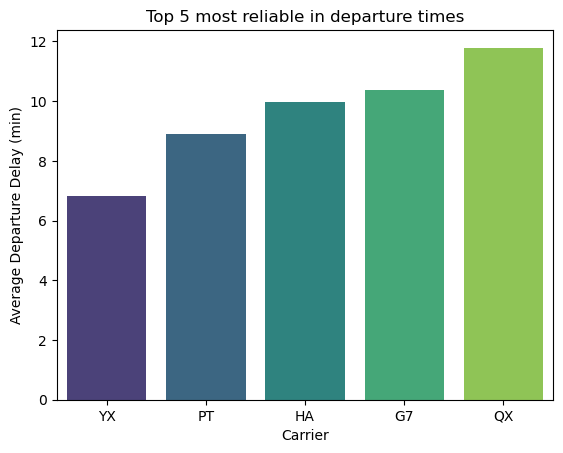

In [206]:
sns.barplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=top_5_dep, palette='viridis')

# Set labels
plt.xlabel('Carrier')
plt.ylabel('Average Departure Delay (min)')
plt.title('Top 5 most reliable in departure times')

# Display the plot
# plt.show()
plt.savefig('Top 5 most reliable in departure times2.jpeg', format='jpeg', dpi=300)

/var/folders/3v/mdv6bm7j6n99zg9hqgt9n70r0000gn/T/ipykernel_84684/2533555769.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=worst_5_dep, palette='rocket')


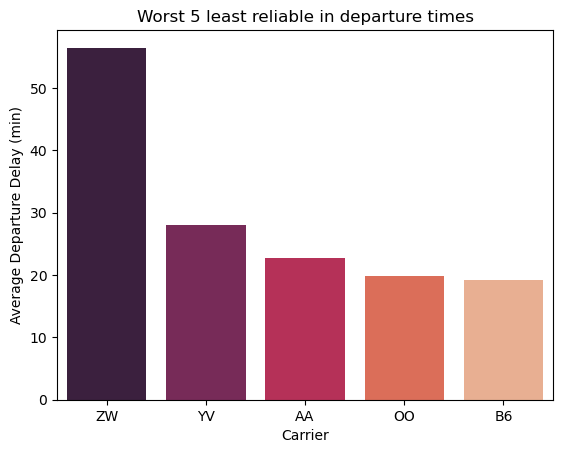

In [166]:
sns.barplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=worst_5_dep, palette='rocket')

# Set labels
plt.xlabel('Carrier')
plt.ylabel('Average Departure Delay (min)')
plt.title('Worst 5 least reliable in departure times')

# Display the plot
# plt.show()
plt.savefig('Worst 5 least reliable in departure times.jpeg', format='jpeg', dpi=300)

/var/folders/3v/mdv6bm7j6n99zg9hqgt9n70r0000gn/T/ipykernel_84684/2881686492.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OP_UNIQUE_CARRIER', y='ARR_DELAY', data=top_5_arr, palette='viridis')


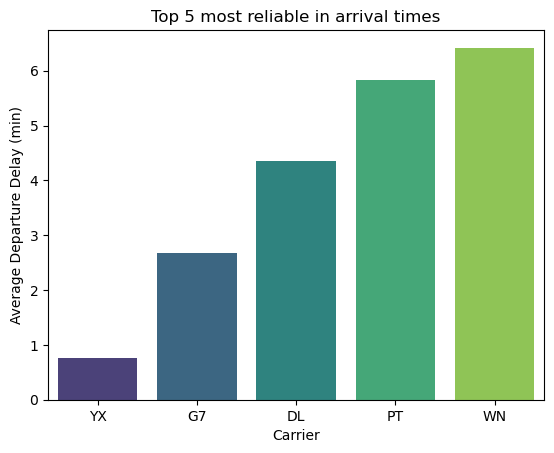

In [184]:
sns.barplot(x='OP_UNIQUE_CARRIER', y='ARR_DELAY', data=top_5_arr, palette='viridis')

# Set labels
plt.xlabel('Carrier')
plt.ylabel('Average Departure Delay (min)')
plt.title('Top 5 most reliable in arrival times')

# Display the plot
# plt.show()
plt.savefig('Top 5 most reliable in arrival times.jpeg', format='jpeg', dpi=300)

/var/folders/3v/mdv6bm7j6n99zg9hqgt9n70r0000gn/T/ipykernel_84684/493935392.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OP_UNIQUE_CARRIER', y='ARR_DELAY', data=worst_5_arr, palette='rocket')


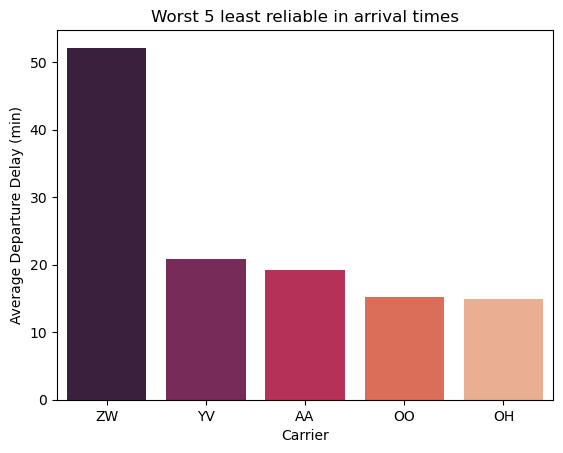

In [200]:
sns.barplot(x='OP_UNIQUE_CARRIER', y='ARR_DELAY', data=worst_5_arr, palette='rocket')

# Set labels
plt.xlabel('Carrier')
plt.ylabel('Average Departure Delay (min)')
plt.title('Worst 5 least reliable in arrival times')

# Display the plot
# plt.show()
plt.savefig('Worst 5 least reliable in arrival times.jpeg', format='jpeg', dpi=300)

/var/folders/3v/mdv6bm7j6n99zg9hqgt9n70r0000gn/T/ipykernel_84684/2399009426.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OP_UNIQUE_CARRIER', y='TOTAL_DELAY', data=top_5_overall, palette='viridis')


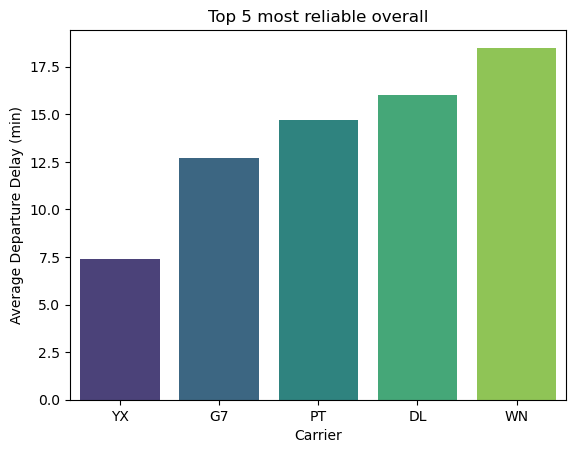

In [186]:
sns.barplot(x='OP_UNIQUE_CARRIER', y='TOTAL_DELAY', data=top_5_overall, palette='viridis')

# Set labels
plt.xlabel('Carrier')
plt.ylabel('Average Departure Delay (min)')
plt.title('Top 5 most reliable overall')

# Display the plot
# plt.show()
plt.savefig('Top 5 most reliable overall.jpeg', format='jpeg', dpi=300)

/var/folders/3v/mdv6bm7j6n99zg9hqgt9n70r0000gn/T/ipykernel_84684/4247851808.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OP_UNIQUE_CARRIER', y='TOTAL_DELAY', data=worst_5_overall, palette='rocket')


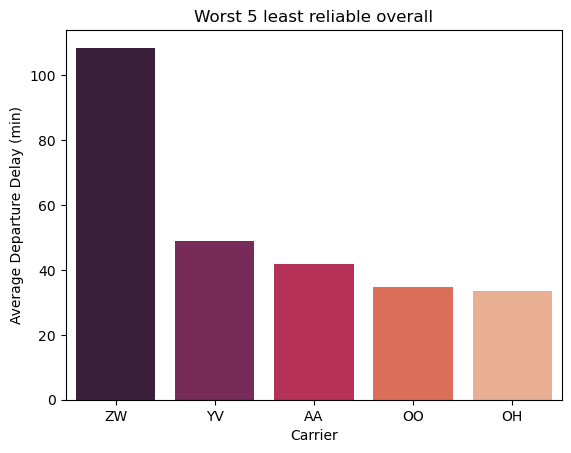

In [198]:
sns.barplot(x='OP_UNIQUE_CARRIER', y='TOTAL_DELAY', data=worst_5_overall, palette='rocket')

# Set labels
plt.xlabel('Carrier')
plt.ylabel('Average Departure Delay (min)')
plt.title('Worst 5 least reliable overall')

# Display the plot
# plt.show()
plt.savefig('Worst 5 least reliable overall.jpeg', format='jpeg', dpi=300)

/var/folders/3v/mdv6bm7j6n99zg9hqgt9n70r0000gn/T/ipykernel_84684/4129712027.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OP_UNIQUE_CARRIER', y='TOTAL_DELAY', data=df_sorted_mean, palette='icefire')


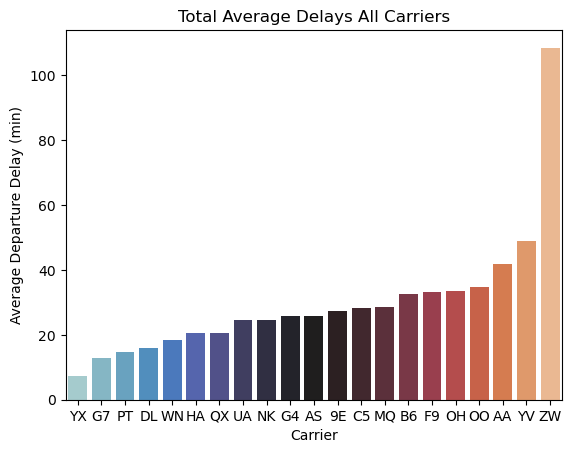

In [190]:
sns.barplot(x='OP_UNIQUE_CARRIER', y='TOTAL_DELAY', data=df_sorted_mean, palette='icefire')

# Set labels
plt.xlabel('Carrier')
plt.ylabel('Average Departure Delay (min)')
plt.title('Total Average Delays All Carriers')

# Display the plot
# plt.show()
plt.savefig('Total Average Delays All Carriers.jpeg', format='jpeg', dpi=300)

In [ ]:
# df_sorted_sum = grouped_sum.sort_values(by='TOTAL_DELAY', ascending=True).round(2)
# df_sorted_sum

In [ ]:
# By MKT UNIQUE CARRIER
flight['TOTAL_DELAY'] = flight['ARR_DELAY'] + flight['DEP_DELAY']
grouped_mean2 = flight.groupby('MKT_UNIQUE_CARRIER')[['TOTAL_DELAY']].mean()

In [ ]:
df_sorted_mean2 = grouped_mean2.sort_values(by='TOTAL_DELAY', ascending=True).round(2)
df_sorted_mean2